In [76]:
import pandas as pd
import numpy as np
# import library

io = "B:\data_mining-master\sleep1.csv"
data = pd.read_csv(io)
# read csv file

In [77]:
data # have a glimpse of data

,species,slowWaveSleep,dreamSleep,sleep,body,brain,life,gestation,predation,sleepExposure,danger
0,African_elephant,NaN,NaN,3.3,6654.000,5712.0,38.6,645.0,3,5,3
1,African_giant_pouched_rat,6.3,2.0,8.3,1.000,6.6,4.5,42.0,3,1,3
2,Arctic_Fox,NaN,NaN,12.5,3.385,44.5,14.0,60.0,1,1,1
3,Arctic_ground_squirrel,NaN,NaN,16.5,0.920,5.7,NaN,25.0,5,2,3
4,Asian_elephant,2.1,1.8,3.9,2547.000,4603.0,69.0,624.0,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...
57,Tree_hyrax,4.9,0.5,5.4,2.000,12.3,7.5,200.0,3,1,3
58,Tree_shrew,13.2,2.6,15.8,0.104,2.5,2.3,46.0,3,2,2
59,Vervet,9.7,0.6,10.3,4.190,58.0,24.0,210.0,4,3,4
60,Water_opossum,12.8,6.6,19.4,3.500,3.9,3.0,14.0,2,1,1


In [78]:
data = pd.DataFrame(data)
for column in list(data.columns[data.isnull().sum() > 0]):
    mean_val = data[column].mean()
    data[column].fillna(mean_val, inplace=True) 
data["sleep"] = data["slowWaveSleep"].add(data["dreamSleep"])
df = data
# fill NAs with mean value

In [79]:
data
# check if it is working

,species,slowWaveSleep,dreamSleep,sleep,body,brain,life,gestation,predation,sleepExposure,danger
0,African_elephant,8.672917,1.972,10.644917,6654.000,5712.0,38.600000,645.0,3,5,3
1,African_giant_pouched_rat,6.300000,2.000,8.300000,1.000,6.6,4.500000,42.0,3,1,3
2,Arctic_Fox,8.672917,1.972,10.644917,3.385,44.5,14.000000,60.0,1,1,1
3,Arctic_ground_squirrel,8.672917,1.972,10.644917,0.920,5.7,19.877586,25.0,5,2,3
4,Asian_elephant,2.100000,1.800,3.900000,2547.000,4603.0,69.000000,624.0,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...
57,Tree_hyrax,4.900000,0.500,5.400000,2.000,12.3,7.500000,200.0,3,1,3
58,Tree_shrew,13.200000,2.600,15.800000,0.104,2.5,2.300000,46.0,3,2,2
59,Vervet,9.700000,0.600,10.300000,4.190,58.0,24.000000,210.0,4,3,4
60,Water_opossum,12.800000,6.600,19.400000,3.500,3.9,3.000000,14.0,2,1,1


In [80]:
data.keys()
# get columns of dataset

Index(['species', 'slowWaveSleep', 'dreamSleep', 'sleep', 'body', 'brain',
       'life', 'gestation', 'predation', 'sleepExposure', 'danger'],
      dtype='object')

In [81]:
x = data[['gestation','life','body','brain','predation','sleepExposure','danger']]
x = np.array(x)
y = data['sleep']
y = np.array(y)
# find x and y

In [82]:
x.shape
# check the shape

(62, 7)

In [83]:
from sklearn.model_selection import train_test_split
# from sklearn import train_test_split to find train and test array
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)
x_real_train, x_mse_finder, y_real_train, y_mse_finder = train_test_split(x_train, y_train,test_size=0.35)
# choose test size with 0.35 for a better prediction result

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score

Multiple Linear Regression

In [85]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train,y_train)
y_pred = model.predict(x_test)
r2_score(y_test,y_pred)
# linear regression 

-1.063924951753823

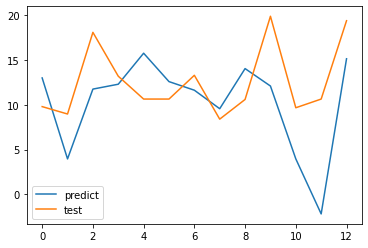

In [86]:
import matplotlib.pyplot as plt
plt.plot(range(len(y_pred)),y_pred)
plt.plot(range(len(y_test)),y_test)
plt.legend(['predict','test']) # legend in figure
plt.show()
# shoe predict and test linear relationship

logistic regression

In [87]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0).fit(x_train,y_train.astype('int'))
y_pred_lr = model.predict(x_test)
r2_score(y_test,y_pred_lr)

B:\anacondaapp\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-1.4193915578390914

because  r2_score(y_test,y_pred_lr) < r2_score(y_test,y_pred) so we choose linear regression

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression().fit(x_real_train,y_real_train)
y_mse_pred = model.predict(x_mse_finder)
y_pred = model.predict(x_test)
mse_reference = mean_squared_error(y_mse_finder,y_mse_pred)
print(mse_reference)
# find MSE as a reference

18.039354339081807


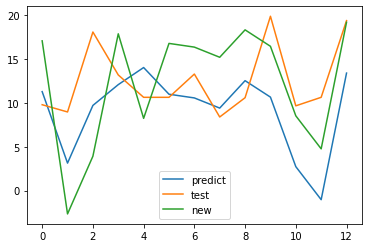

In [89]:
import matplotlib.pyplot as plt
plt.plot(range(len(y_pred)),y_pred)
plt.plot(range(len(y_test)),y_test)

import copy
copy_pred = copy.deepcopy(y_pred)
mean_error = (mean_squared_error(y_test,y_pred)) ** 0.5
for index in range(len(y_mse_pred)):
    if abs(y_mse_pred[index] + mse_reference - y_mse_finder[index]) >= abs(y_mse_pred[index] - mse_reference - y_mse_finder[index]):
        if index < len(copy_pred):
            copy_pred[index] = copy_pred[index] - mean_error
    else:
        if index < len(copy_pred):
            copy_pred[index] = copy_pred[index] + mean_error
    
plt.plot(range(len(copy_pred)),copy_pred)
plt.legend(['predict','test','new'])
plt.show()

# plot another graph as a complement to show the relationship with MSE prediction

In [111]:
print(mean_squared_error(y_test,y_pred),
mean_squared_error(y_test,y_pred),
median_absolute_error(y_test,y_pred),
explained_variance_score(y_test,y_pred),
r2_score(y_test,y_pred))


16.41382849364405 16.41382849364405 3.6085255778961054 0.2740525082751767 0.1293229203377051



Cross-validation

In [91]:
from sklearn.model_selection import KFold

In [92]:
kf = KFold(5)
kf.split(x)

<generator object _BaseKFold.split at 0x000001C117B2CDD0>

In [93]:
i = 0
r2value = np.zeros((5,1))
for train_index, test_index in kf.split(x):
    x_train = x[train_index]
    x_test = x[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    model = LinearRegression().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2value[i] = r2_score(y_test,y_pred)
    i = i + 1

In [94]:
 r2value

array([[-7.26351465],
       [-0.53587477],
       [ 0.37790281],
       [ 0.08302571],
       [ 0.12932292]])

In [95]:
x

array([[6.45000000e+02, 3.86000000e+01, 6.65400000e+03, 5.71200000e+03,
        3.00000000e+00, 5.00000000e+00, 3.00000000e+00],
       [4.20000000e+01, 4.50000000e+00, 1.00000000e+00, 6.60000000e+00,
        3.00000000e+00, 1.00000000e+00, 3.00000000e+00],
       [6.00000000e+01, 1.40000000e+01, 3.38500000e+00, 4.45000000e+01,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.50000000e+01, 1.98775862e+01, 9.20000000e-01, 5.70000000e+00,
        5.00000000e+00, 2.00000000e+00, 3.00000000e+00],
       [6.24000000e+02, 6.90000000e+01, 2.54700000e+03, 4.60300000e+03,
        3.00000000e+00, 5.00000000e+00, 4.00000000e+00],
       [1.80000000e+02, 2.70000000e+01, 1.05500000e+01, 1.79500000e+02,
        4.00000000e+00, 4.00000000e+00, 4.00000000e+00],
       [3.50000000e+01, 1.90000000e+01, 2.30000000e-02, 3.00000000e-01,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.92000000e+02, 3.04000000e+01, 1.60000000e+02, 1.69000000e+02,
        4.00000000e+00, 5

drop the outliers and compare

In [96]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(x)
X

array([[1.00000000e+00, 3.73469388e-01, 1.00000000e+00, 1.00000000e+00,
        5.00000000e-01, 1.00000000e+00, 5.00000000e-01],
       [4.73933649e-02, 2.55102041e-02, 1.49534227e-04, 1.13098010e-03,
        5.00000000e-01, 0.00000000e+00, 5.00000000e-01],
       [7.58293839e-02, 1.22448980e-01, 5.07965515e-04, 7.76629679e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.05371248e-02, 1.82424349e-01, 1.37511375e-04, 9.73413214e-04,
        1.00000000e+00, 2.50000000e-01, 5.00000000e-01],
       [9.66824645e-01, 6.83673469e-01, 3.82776813e-01, 8.05842580e-01,
        5.00000000e-01, 1.00000000e+00, 7.50000000e-01],
       [2.65402844e-01, 2.55102041e-01, 1.58476224e-03, 3.14013299e-02,
        7.50000000e-01, 7.50000000e-01, 7.50000000e-01],
       [3.63349131e-02, 1.73469388e-01, 2.70514180e-06, 2.80118910e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.00315956e-01, 2.89795918e-01, 2.40449534e-02, 2.95630495e-02,
        7.50000000e-01, 1

optimise value r2value

In [97]:
i = 0
max_r2value = 0
r2value = np.zeros((5,1))
for train_index, test_index in kf.split(x):
    x_train = x[train_index]
    x_test = x[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    model = LinearRegression().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2value[i] = r2_score(y_test,y_pred)
    if max_r2value < r2_score(y_test,y_pred):
        max_r2value = r2_score(y_test,y_pred)
        y_pred_best = y_pred
        y_test_best = y_test
    i = i + 1

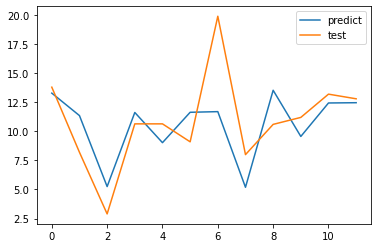

In [98]:
import matplotlib.pyplot as plt
plt.plot(range(len(y_pred)),y_pred_best)
plt.plot(range(len(y_test)),y_test_best)
plt.legend(['predict','test']) # legend in figure
plt.show()

In [99]:
max_r2value

0.377902813648185

# ridge regression 

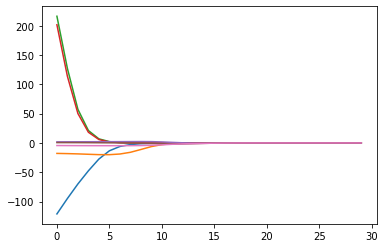

In [102]:

import numpy as np

import matplotlib.pyplot as plt

 

def ridgeRegres(xMat,yMat,lam=0.2):

    xTx = xMat.T*xMat

    denom = xTx + np.eye(np.shape(xMat)[1])*lam

    if np.linalg.det(denom) == 0.0:

        print("This matrix is singular, cannot do inverse")

        return

    ws = denom.I * (xMat.T*yMat)

    return ws

 

def ridgeTest(xArr,yArr):

    xMat = np.mat(xArr); yMat=np.mat(yArr).T

    yMean = np.mean(yMat) # 数据标准化

    # print(yMean)

    yMat = yMat - yMean

    # print(xMat)

    #regularize X's

    xMeans = np.mean(xMat,0)

    xVar = np.var(xMat,0)

    xMat = (xMat - xMeans) / xVar #（特征-均值）/方差

    numTestPts = 30

    wMat = np.zeros((numTestPts,np.shape(xMat)[1]))

    for i in range(numTestPts): # 测试不同的lambda取值，获得系数

        ws = ridgeRegres(xMat,yMat,np.exp(i-10))

        wMat[i,:]=ws.T

    return wMat

 

 

# import data


xArr = x

yArr = y

# print(xArr,yArr)

ridgeWeights = ridgeTest(xArr,yArr)

# print(ridgeWeights)

plt.plot(ridgeWeights)

plt.show()